> **DO NOT EDIT IF INSIDE `computational_analysis_of_big_data_2017` folder** 

# Week 2

*Thursday, August 31, 2017*

## Outline

This week's exercises build on what you have read (or will read) for today in the book we use for this course. We cover:
* The introduction to the book
* Useful Python functionality
* Some more advanced Reddit scraping and visualization of that data

This is the last week where we will be doing Python for the sake of learning Python. If you feel that it is very difficult you should read the chapter in the book carefully. Alternatively, you can go through [Codeacademy's Python course](https://www.codecademy.com/learn/learn-python).

**A word of advice**: Some of you may be new to solving problems using code. At this point you may be wondering what level of detail I expect from your solutions. This is the guideline: Solve the exercises in a manner that allows you to—later in life—use them as examples. This also means that you should add code comments when the code isn't self-explanatory or if you're afraid it won't make sense when you look at it with fresh eyes. You may also want to comment on your output in plain text to capture the conclusions you arrive at throughout your analysis. But express yourself succinctly... Or to quote good old Einstein: *"Make everything as simple as possible, but not simpler"*. When you optimize for your own future comprehension, you also optimize for mine (and your peers').

## Material

*Data Science from Scratch* Chapter 1, 2, 3.
* *Chapter 1 - Introduction:* Read this. It introduces data science very nicely and sets the stage for the book.
* *Chapter 2 - A Crash Course in Python:* Study pages 15-26, and maybe take a dip into "The Not-So-Basics" if you feel like challenging yourself. If you are a skilled Python programmer at this point you can dash through a lot of this and take a closer look when things look foreign.
* *Chapter 3 - Visualizing Data:* This is a very short chapter that gives a few examples of how to use `matplotlib`, which is the Python library we we'll be using for data visualization. Read the introduction, take note of what's in there and use it as reference when you need it.

## Exercises

### Part 1: Introduction (DSFS Chapter 1)

>**Ex. 2.1.1**: The VP of Networking tasks you with finding the key connectors in the company.
1. Which of your colleagues have greatest degree centrality? What is the value?
2. Who has the lowest? What is that value?
3. Skip ahead to chapter 21. Who has the highest betweenness centrality, and why?

>**Ex. 2.1.2**: The VP of Public Relations asks you to produce some fun fact about how much data scientists earn. She gives you a datasheet which pairs tenure with yearly salary.
1. Why is it useless to aggregate salary for each tenure? How does bucket'ing (also: *histogramming*) help?
2. Joel hints at a fundamental problem with the bucketing approach when he writes "...we chose the buckets in a pretty arbitrary way." What could that problem be?
3. Can you give an example of a method that could be used for predicting the salary effect of having an additional year of experience?


### Part 2: A Crash Course in Python (DSFS Chapter 2)

>**Ex. 2.2.1**: Which is better:
1. Simple or complex?
2. Flat or nested?
3. Sparse or dense?

>*Hint: find the Zen within*

>**Ex. 2.2.1**: Which is better:
1. Simple > complex
2. Flat > nested
3. Sparse > dense

>**Ex. 2.2.2**: Why does `5 / 2` give `2` in Python 2.7?

/ in python 2 is integer division

>**Ex. 2.2.3**: What is the point of using `try` and `except`? Write some code that shows how to use these.

essentially an if/else block where the condition is "If the following code works, then run it, else [run except block]"

>**Ex 2.2.4**: About `defaultdict`s:
1. What is a `defaultdict`? How would you say it is different from a normal Python `dict`?

    a. default dict has a default value for new keys, dict is also more efficient ( i think ) in some cases, as it is optimized, whereas the default dict is simply a list of tuples
    
2. Write some code that takes a list of tuples:

>        l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

>     And produces a `defaultdict` object

>        defaultdict(<type 'list'>, {'a': [1, None, None], 'c': [False], 'b': [3, True]})

>*Hint: you can import `defaultdict` from `collections`*

In [7]:
from collections import defaultdict

l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]
d = defaultdict(list)

# for key, item in list
for k, i in l:
    if k in d:
        d[k].append(i)
    else:
        d.update({k:[i]})
        
print(d)

defaultdict(<type 'list'>, {'a': [1, None, None], 'c': [False], 'b': [3, True]})


**Ans. 2.2.4.1**: `defaultdict`s can be used just like normal Python `dict`s. The important difference is that when you initiate it, you do so with a datatype. From the documentation (read with `help(defaultdict)`) I understand that when you use a key which does not yet exist, the default factory creates the requested key along with a value of the input datatype. This allows you to do things like `my_dict[new_key].append(some_value)`, which would have raised a `KeyError` had `my_dict` been a `dict` type object.

**Ans. 2.2.4.2**:

In [8]:
from collections import defaultdict

l = [("a", 1), ("b", 3), ("a", None), ("c", False), ("b", True), ("a", None)]

my_dict = defaultdict(list)     # Create the defaultdict
for key, value in l:            # Loop over the pairs inside the list
    my_dict[key].append(value)  # Append the value to the object that the key creates/returns
    
# Print the result
my_dict

defaultdict(list, {'a': [1, None, None], 'b': [3, True], 'c': [False]})

>**Ex 2.2.5**: Take a list `a = list("justreadtheinstructions")` and
1. count the number of times each element occurs using `Counter`,
2. report the two most common elements

>*Hint: you can import `Counter` from `collections`*

In [8]:
from collections import Counter
from __future__ import print_function

a = list("justreadtheinstructions")
c = Counter(a)
print(c)
print(c.most_common(2))

Counter({'t': 4, 's': 3, 'e': 2, 'i': 2, 'n': 2, 'r': 2, 'u': 2, 'a': 1, 'c': 1, 'd': 1, 'h': 1, 'j': 1, 'o': 1})
[('t', 4), ('s', 3)]


>**Ex 2.2.6**: Take another list `b = list("ofcourseistillloveyou")` and
1. get the `set` of characters that exist in both `a` and `b` (intersection),
2. get the `set` of characters that exist in either `a` or `b` (union), and
3. compute the [Jaccard similarity](https://en.wikipedia.org/wiki/Jaccard_index) between the distinct elements in `a` and `b`.

>*Hint: use the `set` function to get a `set`-type object of distinct elements from a list*

In [13]:
b = set(list("ofcourseistillloveyou"))
a = set(a)

# intersection
i = a & b
print(i)
# union
u = a | b
print(u)
# jaccard similarity
print(float(len(i)) / len(u))

set(['c', 'e', 'i', 'o', 's', 'r', 'u', 't'])
set(['a', 'c', 'e', 'd', 'f', 'i', 'h', 'j', 'l', 'o', 'n', 's', 'r', 'u', 't', 'v', 'y'])
0.470588235294


### Part 3: Visualization (DSFS Chapter 3)

>**Ex. 2.3.1**: Create two lists, `x` and `y`, that each contain 10 numbers of your liking. Using `matplotlib`'s `scatter` function, plot these two lists against each other. Give your figure x and y axis labels and a title.

>*Hint: To get figures to display inside the notebook, use the Jupyter magic `%matplotlib inline`* <br>
>***Info***:* From now on, unless otherwise stated, you should always label your axes and title your figure appropriately.*

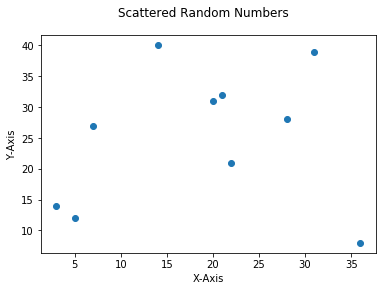

In [28]:
%matplotlib inline 
import random
import numpy as np
import matplotlib.pyplot as plt

# get 10 random numbers from 0-50
x = random.sample(xrange(50), 10)
y = random.sample(xrange(50), 10)

plt.scatter(x, y)
plt.suptitle("Scattered Random Numbers")
plt.xlabel("X-Axis")
plt.ylabel("Y-Axis")
plt.show()

>**Ex. 2.3.2**: Plot the score versus number of comments for posts on the `gameofthrones` and `news` subreddits.
1. The coding part
    * Write a function that takes as input the name of a subreddit and returns the data on the subreddit as a json object.
    * Write another function that takes as input some reddit data, extracts the scores and number of comments into seperate lists and returns both lists.
    * Using these functions, get a set of x and y variables for each subreddit.
    * In two seperate figures, floating side by side, scatter plot each set of x and y variables against each other. Choose different colors for the points in either plot.
2. The reflecting part
    * The News and GOT trends look distinctly different. Explain how they look different. Why might this be?

>My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2b.png).

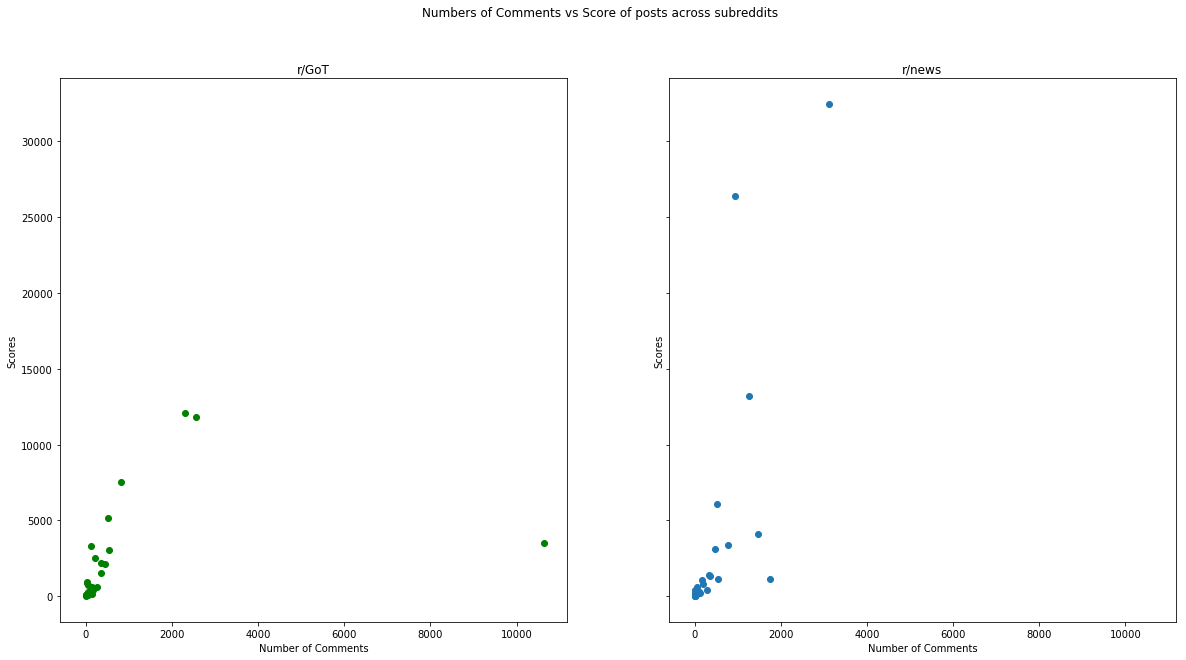

In [160]:
import requests, json, time

def getSubData(subreddit):
    """ given the name of a subreddit, return a json object of the sub's data """
    # wait for the request to succeed. if 'data' is not in data's keys, 
    # then the returned json object is just an error message, so try again in 5 seconds.
    data = {}
    while 'data' not in data:
        data = requests.get("https://www.reddit.com/r/"+subreddit+"/.json").json()
        time.sleep(5)
        
    # once we get a populated json object, we can return that.
    return data

def getScoresAndComments(data):
    """ given the data from a subreddit, 
        return lists of the number of comments and scores of the posts """
    scores = [x['data']['score'] for x in data['data']['children']]
    comments = [x['data']['num_comments'] for x in data['data']['children']]
    return (scores, comments)

# get json data and lists of the scores and comments for the two subs
newsData = getSubData("news")
newsScores, newsComments = getScoresAndComments(newsData)

GoTData = getSubData("gameofthrones")
GoTScores, GoTComments = getScoresAndComments(GoTData)

# create sub plots
f, (gplt, nplt) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# set the overall title
plt.suptitle("Numbers of Comments vs Score of posts across subreddits")

# creating the GoT subplot
gplt.set_ylabel("Scores")
gplt.set_xlabel("Number of Comments")
gplt.set_title("r/GoT")
gplt.scatter(GoTComments, GoTScores, color='green')

# creating the news subplot
nplt.set_title("r/news")
nplt.set_ylabel("Scores")
nplt.set_xlabel("Number of Comments")
nplt.scatter(newsComments, newsScores)

plt.show()

r/news has much higher max scores, because it is a more popular subreddit. r/GoT has one post with an extreme number of comments, which might be a discussion post for the recent episode.

>**Ex. 2.3.3**: Looking at the scatter plots there appears to be some unevenness in the number of comments and upvotes that different posts receive.
1. Plot the distributions of x for GOT and News as histograms, side by side.
2. What do these distributions say about how people comment on Reddit?

>My figure looks like [this](http://ulfaslak.com/computational_analysis_of_big_data/exer_figures/example_2.2c.png).

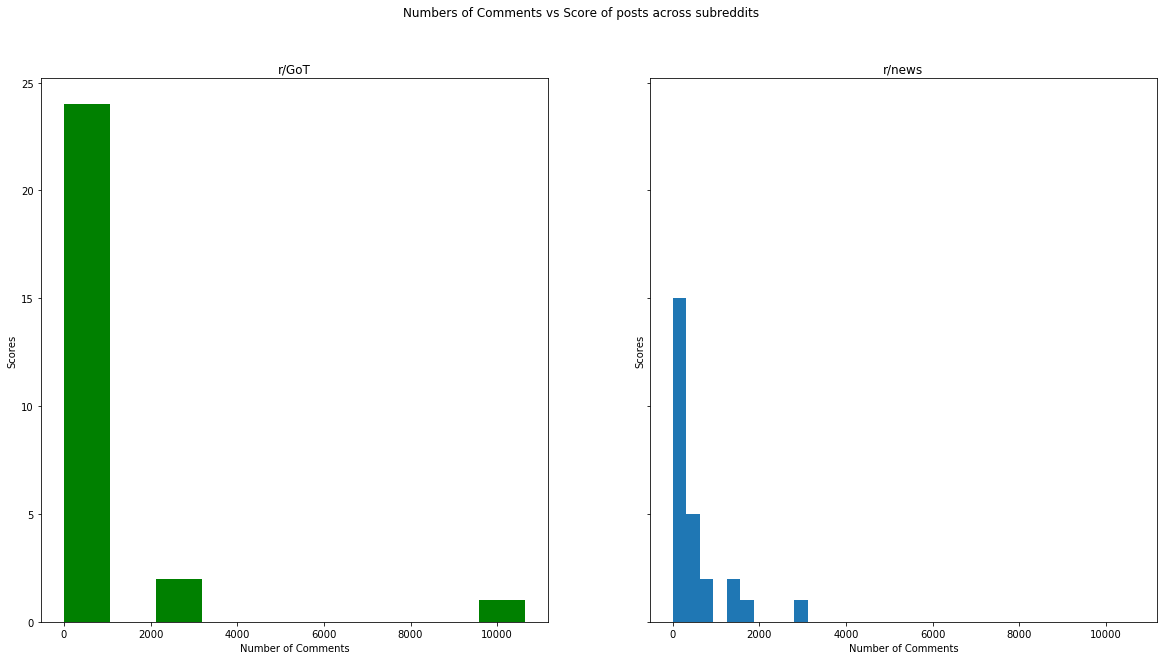

In [170]:
# create sub plots
f, (gplt, nplt) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# set the overall title
plt.suptitle("Numbers of Comments vs Score of posts across subreddits")

# creating the GoT subplot
gplt.set_ylabel("Scores")
gplt.set_xlabel("Number of Comments")
gplt.set_title("r/GoT")
gplt.hist(GoTComments, color='green')

# creating the news subplot
nplt.set_title("r/news")
nplt.set_ylabel("Scores")
nplt.set_xlabel("Number of Comments")
nplt.hist(newsComments)

plt.show()

>**Ex. 2.3.4**: You may have noticed that the data['data'] object has a key called 'after'.
1. What do you think this is?
2. Write a function that takes an integer `N` and the name of a subreddit, and returns a JSON with all posts on the first `N` pages of that subreddit. Use it to retrieve a large number of posts.
3. Make an updated version of the figures you produced in Ex. 2.3.2-3 with this larger dataset.
4. Visualize the number of posts over time.

In [171]:
# 1. to get the next page of posts

def getData(link):
    """ given the name of a subreddit, return a json object of the sub's data """
    # wait for the request to succeed. if 'data' is not in data's keys, 
    # then the returned json object is just an error message, so try again in 5 seconds.
    data = {}
    while 'data' not in data:
        data = requests.get("https://www.reddit.com/"+link+"/.json").json()
        
    # once we get a populated json object, we can return that.
    return data

def getNPages(subreddit, n):
    data = getData('r/'+subreddit)
    posts = data['data']['children']
    print("got first page")
    for _ in range(n-1):
        nextpage = data['data']['after'][3:]
        print("fetching data from " + nextpage)
        data = getData(nextpage)
        posts += data['data']['children']
        print("we now have "+len(posts) + " posts.")
    return posts

ps = getNPages('news', 3)
print(ps)

def getScoresAndComments(data):
    """ given the data from a subreddit, 
        return lists of the number of comments and scores of the posts """
    scores = [x['data']['score'] for x in data]
    comments = [x['data']['num_comments'] for x in data]
    return (scores, comments)

# get json data and lists of the scores and comments for the two subs
newsScores, newsComments = getScoresAndComments(posts)
GoTScores, GoTComments = getScoresAndComments(posts)

# create sub plots
f, (gplt, nplt) = plt.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)

# set the overall title
plt.suptitle("Numbers of Comments vs Score of posts across subreddits")

# creating the GoT subplot
gplt.set_ylabel("Scores")
gplt.set_xlabel("Number of Comments")
gplt.set_title("r/GoT")
gplt.scatter(GoTComments, GoTScores, color='green')

# creating the news subplot
nplt.set_title("r/news")
nplt.set_ylabel("Scores")
nplt.set_xlabel("Number of Comments")
nplt.scatter(newsComments, newsScores)

plt.show()

got first page
fetching data from 6wyhbc


ConnectionError: ('Connection aborted.', error("(50, 'ENETDOWN')",))